In [23]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'src'))
from sefl_analysis_tools import AnalysisTools
import sefl_analysis_tools as sat
from visualization import *
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('All_cohorts_freezing_workbook_10_22_24.csv')
data = data[data['cohort'].isin(['ptsd2', 'ptsd3', 'ptsd4', 
                                 'ptsd5', 'ptsd6', 'ptsd9'])]
data_old = pd.read_csv('PTSD_filtered.csv')


In [25]:
merged_data = pd.merge(data_old, 
                       data[['id', 'cohort', 'freezing_1s', 'day']], 
                       on=['id', 'cohort', 'day'], how='left')
columns = ['freezing_1s'] + [col for col in merged_data.columns 
                                            if col not in ['freezing_1s']]
merged_data = merged_data[columns]
merged_data = sat.calculate_age_at_sefla(merged_data)
merged_data.head()

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\sefl_analysis_tools.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dob'] = pd.to_datetime(data['dob'])
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\sefl_analysis_tools.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


,freezing_1s,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,psilocybin,cohort_id,dob,age_at_sefla,young
0,2.476,5.03,wt,81,sefla,control,male,ptsd2,60.0,60.0,2021-04-28,11:59 AM,n,n,ptsd2_81,2021-02-16,10.142857,True
1,0.445,0.45,wt,81,seflb,control,male,ptsd2,3.5,3.5,2021-04-29,4:40 PM,n,n,ptsd2_81,2021-02-16,10.142857,True
2,3.920,8.28,wt,81,recall1,control,male,ptsd2,5.0,5.0,2021-04-30,1:37 PM,n,n,ptsd2_81,2021-02-16,10.142857,True
3,3.114,7.12,wt,81,recall2,control,male,ptsd2,5.0,5.0,2021-05-03,10:17 AM,n,n,ptsd2_81,2021-02-16,10.142857,True
4,3.032,7.57,wt,81,recall3,control,male,ptsd2,5.0,5.0,2021-05-05,10:04 AM,n,n,ptsd2_81,2021-02-16,10.142857,True


In [26]:
tools = AnalysisTools(merged_data)

In [27]:
result = tools.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)
print("Repeated ANOVA Result for conditional comparison:")
print(result['anova_result'])
print(f"Required Sample Size per Group: {result['required_sample_size']:.4f}")

post_hoc_result = tools.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for conditional comparison:")
print(post_hoc_result)


Repeated ANOVA Result for conditional comparison:
        Source            SS  DF1  DF2            MS          F         p-unc  \
0    condition  28146.192182    1   67  28146.192182  43.345240  8.359841e-09   
1          day  14697.387359    4  268   3674.346840  29.126489  4.094187e-20   
2  Interaction   1381.881956    4  268    345.470489   2.738539  2.919950e-02   

      p-GG-corr       np2      eps sphericity   W-spher   p-spher  
0           NaN  0.392815      NaN        NaN       NaN       NaN  
1  2.573935e-16  0.303002  0.80337      False  0.620115  0.000222  
2           NaN  0.039269      NaN        NaN       NaN       NaN  
Required Sample Size per Group: 7.1666
Repeated ANOVA Post-hoc analysis pairwise t-test result for conditional comparison:
           Contrast      day        A        B        p-corr   Cohen'd
0               day        -  recall1  recall2  1.360313e-06  0.590850
1               day        -  recall1  recall3  5.084740e-07  0.775957
2               d

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


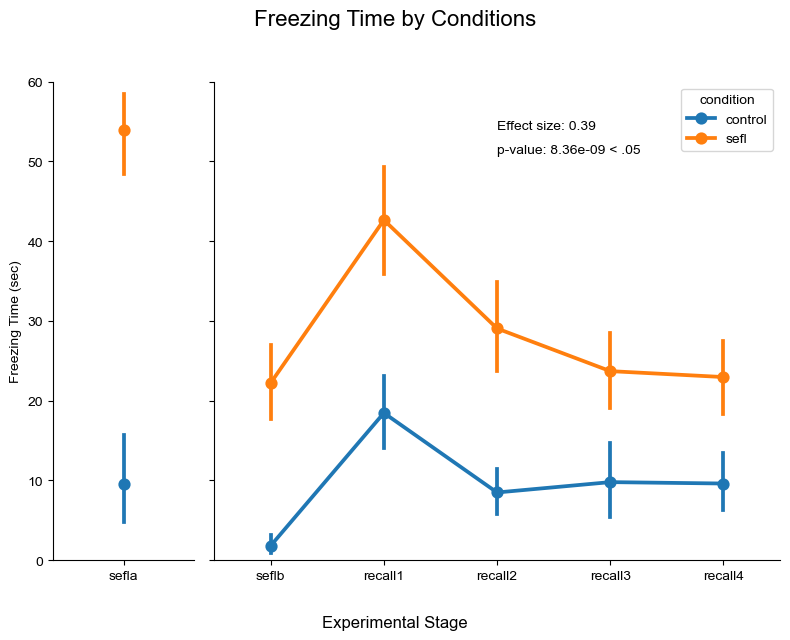

In [28]:
plot_freezing_time(merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.392815, 
                   pvalue = 8.359841e-09, 
                   title_text = 'Freezing Time by Conditions', 
                   hue = 'condition', 
                   output_filename='figure_2a_freezing_cond.svg')

In [29]:
results2 = tools.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Result for age comparison:")
print(results2['anova_result'])
print(f"Required Sample Size per Group: {results2['required_sample_size']:.4f}")

post_hoc_result2 = tools.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for age comparison:")
print(post_hoc_result2)


Repeated ANOVA Result for age comparison:
        Source            SS  DF1  DF2            MS          F         p-unc  \
0        young  14561.751693    1   67  14561.751693  17.089213  1.014018e-04   
1          day  14697.387359    4  268   3674.346840  29.563366  2.252518e-20   
2  Interaction   1881.493156    4  268    470.373289   3.784569  5.178206e-03   

      p-GG-corr       np2      eps sphericity   W-spher   p-spher  
0           NaN  0.203227      NaN        NaN       NaN       NaN  
1  2.573935e-16  0.306155  0.80337      False  0.620115  0.000222  
2           NaN  0.053466      NaN        NaN       NaN       NaN  
Required Sample Size per Group: 16.4043
Repeated ANOVA Post-hoc analysis pairwise t-test result for age comparison:
       Contrast      day        A        B        p-corr   Cohen'd
0           day        -  recall1  recall2  1.360313e-06  0.590850
1           day        -  recall1  recall3  5.084740e-07  0.775957
2           day        -  recall1  recall4  

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


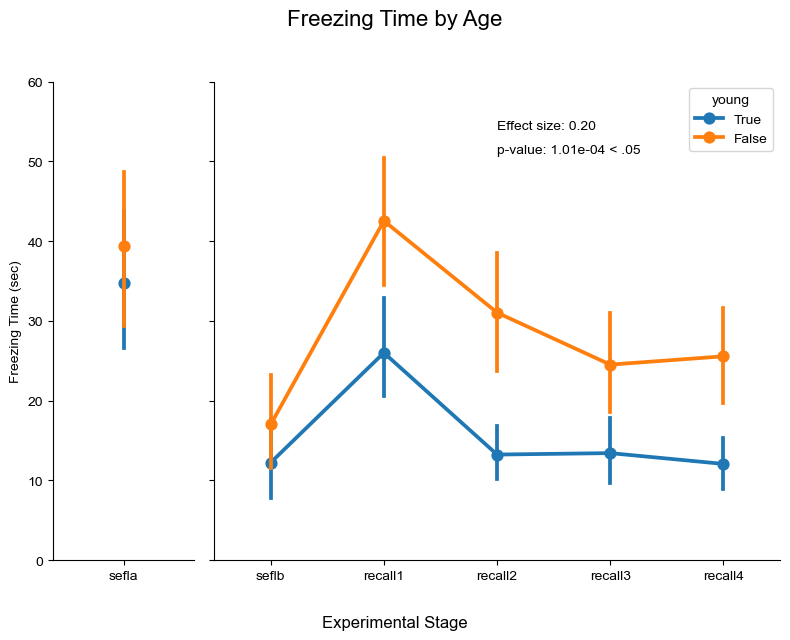

In [30]:
plot_freezing_time(merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.203227, 
                   pvalue = 1.014018e-04, 
                   title_text = 'Freezing Time by Age', 
                   hue = 'young', 
                   output_filename='figure_2b_freezing_age.svg')

In [31]:
sefl_merged_data = merged_data[merged_data['condition'] == 'sefl']
control_merged_data = merged_data[merged_data['condition'] == 'control']

tools3 = AnalysisTools(sefl_merged_data)
tools4 = AnalysisTools(control_merged_data)

results3 = tools3.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Result for age comparison in SEFL:")
print(results3['anova_result'])
print(f"Required Sample Size per Group: {results3['required_sample_size']:.4f}")

post_hoc_result3 = tools3.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for age comparison in sefl:")
print(post_hoc_result3)


results4 = tools4.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Result for age comparison in control:")
print(results4['anova_result'])
print(f"Required Sample Size per Group: {results4['required_sample_size']:.4f}")

post_hoc_result4 = tools4.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='young',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for age comparison in control:")
print(post_hoc_result4)

Repeated ANOVA Result for age comparison in SEFL:
        Source            SS  DF1  DF2            MS          F         p-unc  \
0        young  14012.931953    1   41  14012.931953  23.906269  1.599773e-05   
1          day  12592.428778    4  164   3148.107194  19.686611  2.989364e-13   
2  Interaction   1530.438192    4  164    382.609548   2.392639  5.274845e-02   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.368320       NaN        NaN       NaN       NaN  
1  6.225927e-11  0.324398  0.813106      False  0.601081  0.014764  
2           NaN  0.055139       NaN        NaN       NaN       NaN  
Required Sample Size per Group: 7.8182
Repeated ANOVA Post-hoc analysis pairwise t-test result for age comparison in sefl:
       Contrast      day        A        B        p-corr   Cohen'd
0           day        -  recall1  recall2  4.024330e-04  0.666260
1           day        -  recall1  recall3  2.697424e-05  0.979178
2           day        - 

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


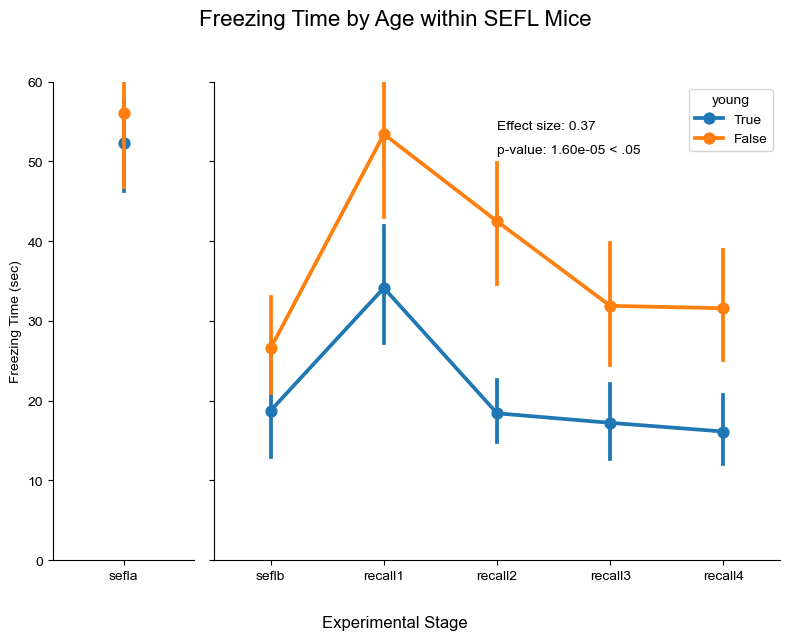

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


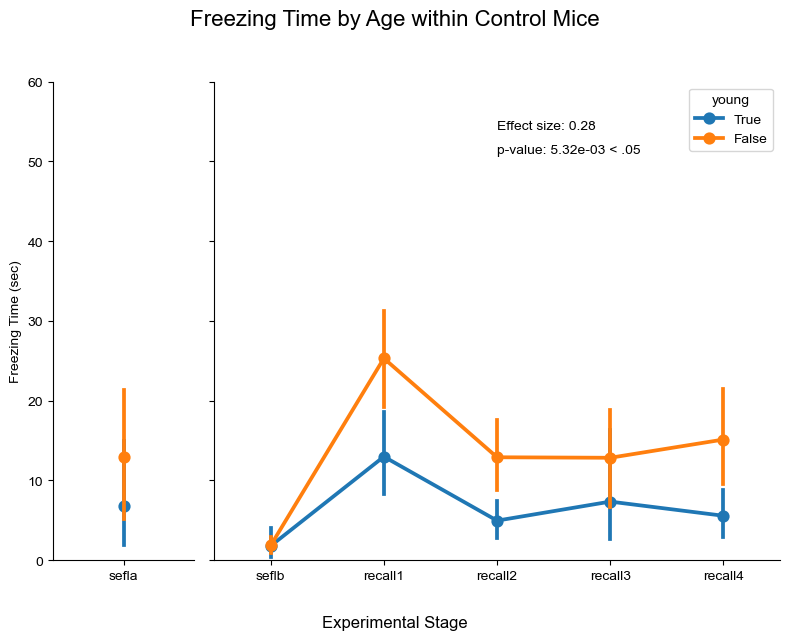

In [32]:
plot_freezing_time(sefl_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.368320, 
                   pvalue = 1.599773e-05, 
                   title_text = 'Freezing Time by Age within SEFL Mice', 
                   hue = 'young', 
                   output_filename='figure_3a_freezing_age_sefl.svg')

plot_freezing_time(control_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.281288, 
                   pvalue = 5.317340e-03, 
                   title_text = 'Freezing Time by Age within Control Mice', 
                   hue = 'young', 
                   output_filename='figure_3b_freezing_age_control.svg')

In [33]:
young_merged_data = merged_data[merged_data['young'] == 'True']
old_merged_data = merged_data[merged_data['young'] == 'False']

tools5 = AnalysisTools(young_merged_data)
tools6 = AnalysisTools(old_merged_data)

results5 = tools5.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Result for condition comparison in young adult mice:")
print(results5['anova_result'])
print(f"Required Sample Size per Group: {results5['required_sample_size']:.4f}")

post_hoc_result5 = tools5.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in young adult mice:")
print(post_hoc_result5)

results6 = tools6.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Result for condition comparison in adult mice:")
print(results6['anova_result'])
print(f"Required Sample Size per Group: {results6['required_sample_size']:.4f}")

post_hoc_result6 = tools6.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in adult mice:")
print(post_hoc_result6)


Repeated ANOVA Result for condition comparison in young adult mice:
        Source           SS  DF1  DF2           MS          F         p-unc  \
0    condition  9570.083336    1   37  9570.083336  26.871905  7.983376e-06   
1          day  5536.036647    4  148  1384.009162  15.218531  1.911470e-10   
2  Interaction   814.374894    4  148   203.593724   2.238712  6.758825e-02   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.420716       NaN        NaN       NaN       NaN  
1  2.061745e-07  0.291439  0.656289      False  0.438318  0.000438  
2           NaN  0.057054       NaN        NaN       NaN       NaN  
Required Sample Size per Group: 6.5194
Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in young adult mice:
           Contrast      day        A        B        p-corr   Cohen'd
0               day        -  recall1  recall2  2.196329e-05  0.835977
1               day        -  recall1  recall3  9.176957

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


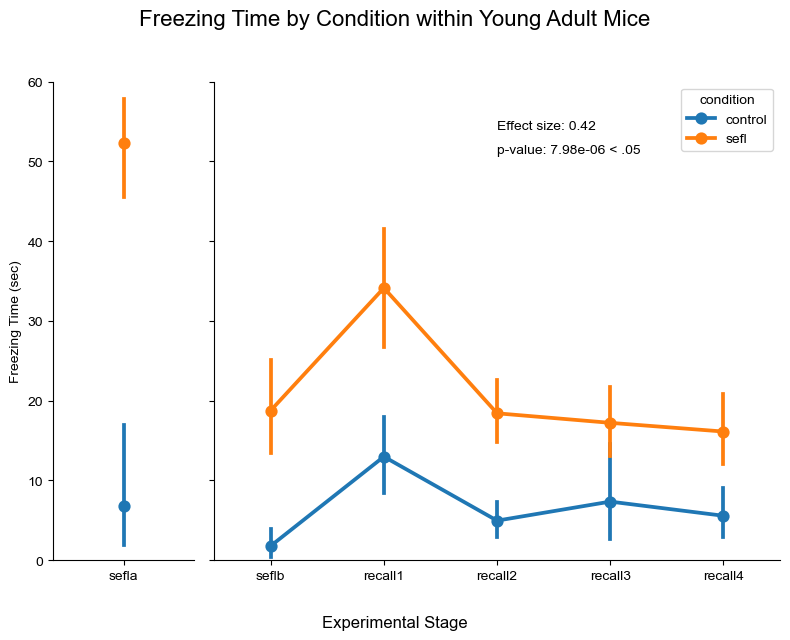

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


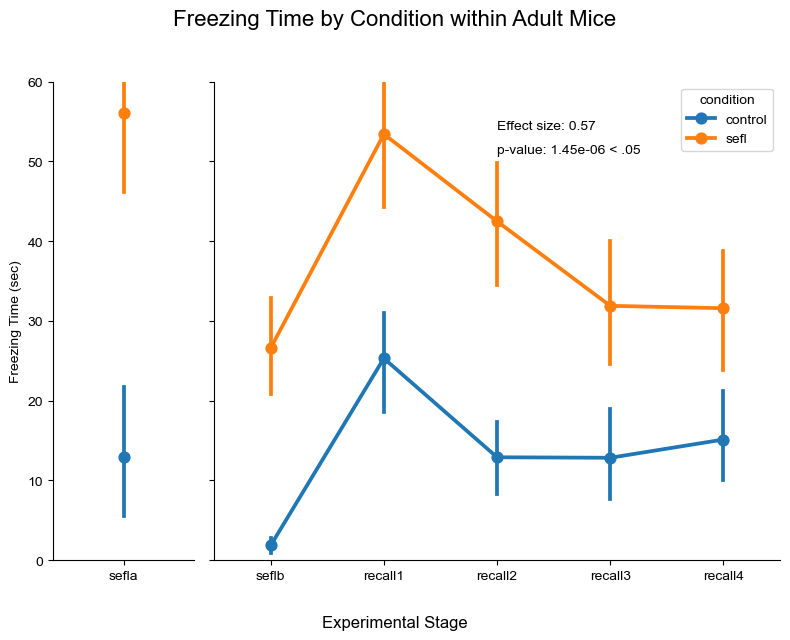

In [34]:
plot_freezing_time(young_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.420716, 
                   pvalue = 7.983376e-06, 
                   title_text = 'Freezing Time by Condition within Young Adult Mice', 
                   hue = 'condition', 
                   output_filename='figure_3c_freezing_condition_young.svg')

plot_freezing_time(old_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.569635, 
                   pvalue = 1.445580e-06, 
                   title_text = 'Freezing Time by Condition within Adult Mice', 
                   hue = 'condition', 
                   output_filename='figure_3d_freezing_condition_old.svg')

In [35]:
results7 = tools.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Result for sex comparison:")
print(results7['anova_result'])
print(f"Required Sample Size per Group: {results7['required_sample_size']:.4f}")

post_hoc_result7 = tools.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for sex comparison")
print(post_hoc_result7)

Repeated ANOVA Result for sex comparison:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0          sex    405.188969    1   67   405.188969   0.381034  5.391428e-01   
1          day  14697.387359    4  268  3674.346840  29.632950  2.048513e-20   
2  Interaction   1959.709192    4  268   489.927298   3.951176  3.916741e-03   

      p-GG-corr       np2      eps sphericity   W-spher   p-spher  
0           NaN  0.005655      NaN        NaN       NaN       NaN  
1  2.573935e-16  0.306655  0.80337      False  0.620115  0.000222  
2           NaN  0.055689      NaN        NaN       NaN       NaN  
Required Sample Size per Group: 691.0235
Repeated ANOVA Post-hoc analysis pairwise t-test result for sex comparison
  Contrast day        A        B        p-corr   Cohen'd
0      day   -  recall1  recall2  1.360313e-06  0.590850
1      day   -  recall1  recall3  5.084740e-07  0.775957
2      day   -  recall1  recall4  7.966685e-09  0.809197
3      day   -  recal

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


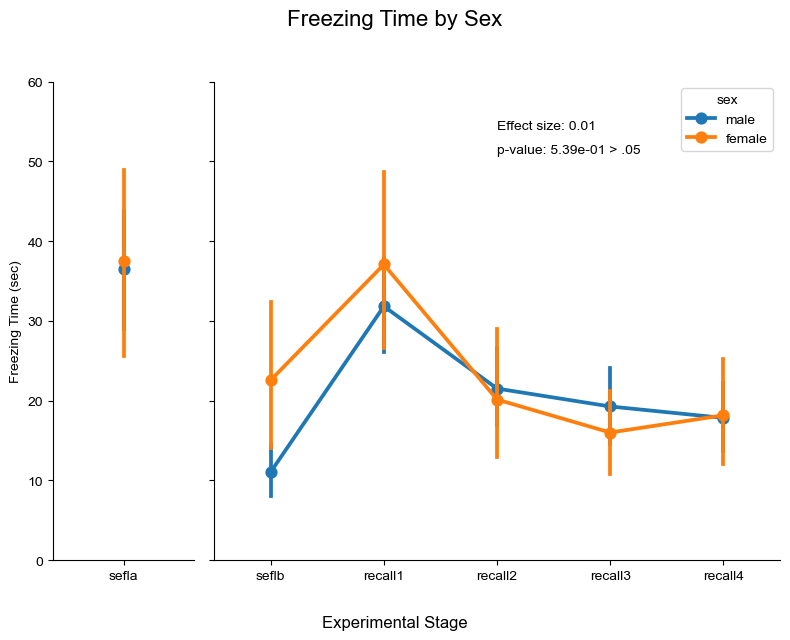

In [36]:
plot_freezing_time(merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.005655, 
                   pvalue = 5.391428e-01, 
                   title_text = 'Freezing Time by Sex', 
                   hue = 'sex', 
                   output_filename='figure_2c_freezing_sex.svg')

In [37]:
male_merged_data = merged_data[merged_data['sex'] == 'male']
female_merged_data = merged_data[merged_data['sex'] == 'female']

tools8 = AnalysisTools(male_merged_data)
tools9 = AnalysisTools(female_merged_data)

results8 = tools8.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Result for condition comparison in male mice:")
print(results8['anova_result'])
print(f"Required Sample Size per Group: {results8['required_sample_size']:.4f}")

post_hoc_result8 = tools8.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in male mice")
print(post_hoc_result8)

results9 = tools9.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Result for condition comparison in female mice:")
print(results9['anova_result'])
print(f"Required Sample Size per Group: {results9['required_sample_size']:.4f}")

post_hoc_result9 = tools9.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='condition',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in female mice")
print(post_hoc_result9)

Repeated ANOVA Result for condition comparison in male mice:
        Source            SS  DF1  DF2            MS          F         p-unc  \
0    condition  19131.515491    1   47  19131.515491  33.906028  4.984641e-07   
1          day  11092.918613    4  188   2773.229653  22.879377  2.044089e-15   
2  Interaction    847.241407    4  188    211.810352   1.747453  1.413062e-01   

      p-GG-corr       np2      eps sphericity   W-spher   p-spher  
0           NaN  0.419079      NaN        NaN       NaN       NaN  
1  6.860650e-12  0.327412  0.74022      False  0.474827  0.000072  
2           NaN  0.035847      NaN        NaN       NaN       NaN  
Required Sample Size per Group: 6.5549
Repeated ANOVA Post-hoc analysis pairwise t-test result for condition comparison in male mice
           Contrast      day        A        B        p-corr   Cohen'd
0               day        -  recall1  recall2  1.115485e-03  0.509099
1               day        -  recall1  recall3  1.099461e-03  0.656

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


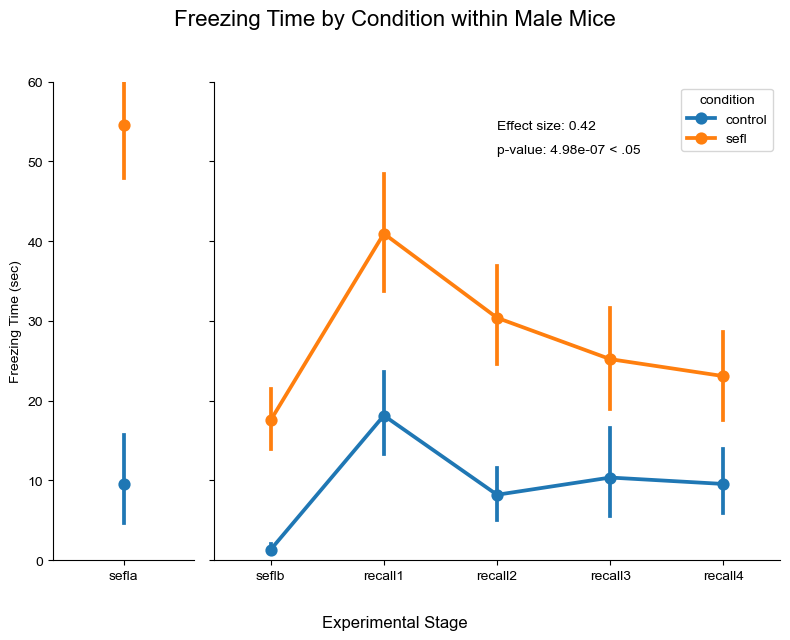

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


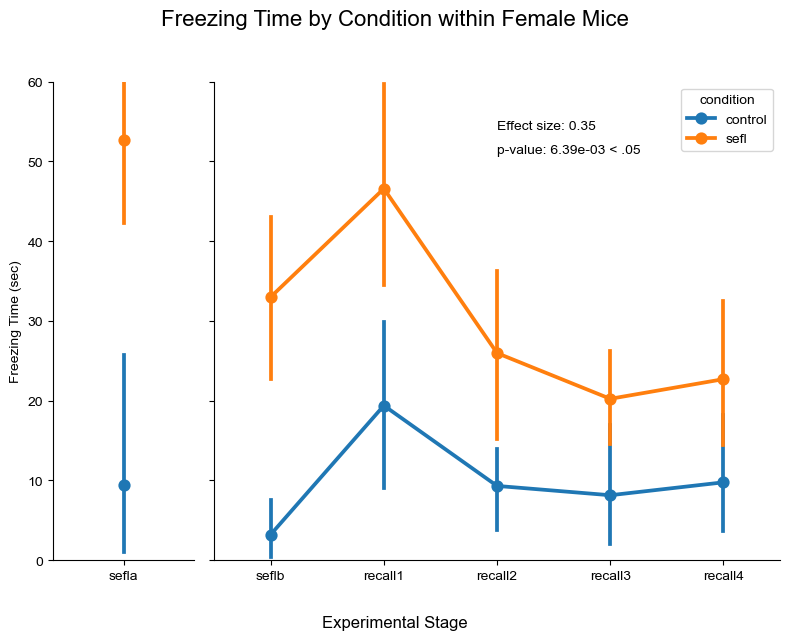

In [38]:
plot_freezing_time(male_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.419079, 
                   pvalue = 4.984641e-07, 
                   title_text = 'Freezing Time by Condition within Male Mice', 
                   hue = 'condition', 
                   output_filename='figure_4c_freezing_condition_male.svg')

plot_freezing_time(female_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.345861 , 
                   pvalue = 6.385616e-03, 
                   title_text = 'Freezing Time by Condition within Female Mice', 
                   hue = 'condition', 
                   output_filename='figure_4d_freezing_condition_female.svg')

In [39]:
results10 = tools3.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Result for sex comparison in SEFL:")
print(results10['anova_result'])
print(f"Required Sample Size per Group: {results10['required_sample_size']:.4f}")

post_hoc_result10 = tools3.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for sex comparison in SEFL mice")
print(post_hoc_result10)

results11 = tools4.repeated_measures_anova(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Result for sex comparison in control:")
print(results11['anova_result'])
print(f"Required Sample Size per Group: {results11['required_sample_size']:.4f}")

post_hoc_result11 = tools3.post_hoc_analysis_significant(
    dv='freezing_1s',
    within='day',
    between='sex',
    subject='cohort_id'
)

print("Repeated ANOVA Post-hoc analysis pairwise t-test result for sex comparison in Control mice")
print(post_hoc_result11)



Repeated ANOVA Result for sex comparison in SEFL:
        Source            SS  DF1  DF2           MS          F         p-unc  \
0          sex    231.710600    1   41   231.710600   0.251234  6.188880e-01   
1          day  12592.428778    4  164  3148.107194  20.541002  9.764223e-14   
2  Interaction   2621.269559    4  164   655.317390   4.275863  2.564004e-03   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.006090       NaN        NaN       NaN       NaN  
1  6.225927e-11  0.333778  0.813106      False  0.601081  0.014764  
2           NaN  0.094440       NaN        NaN       NaN       NaN  
Required Sample Size per Group: 641.4062
Repeated ANOVA Post-hoc analysis pairwise t-test result for sex comparison in SEFL mice
  Contrast day        A        B        p-corr   Cohen'd
0      day   -  recall1  recall2  4.024330e-04  0.666260
1      day   -  recall1  recall3  2.697424e-05  0.979178
2      day   -  recall1  recall4  9.141851e-07  1.022

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


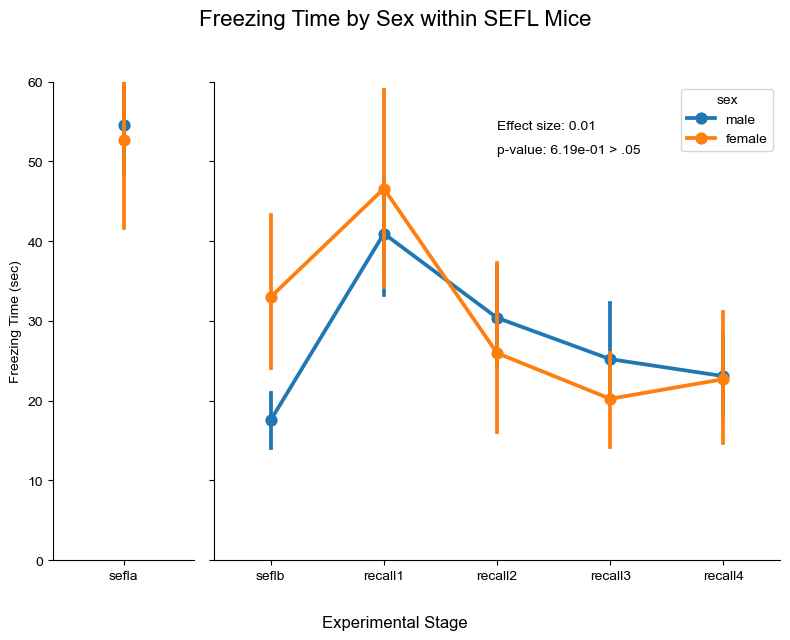

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax1, data=sefla_data, x='day', y=variable, hue=hue, join=True)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\..\..\src\visualization.py:45: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(ax=ax2, data=subset_data, x='day', y=variable, hue=hue, join=True)


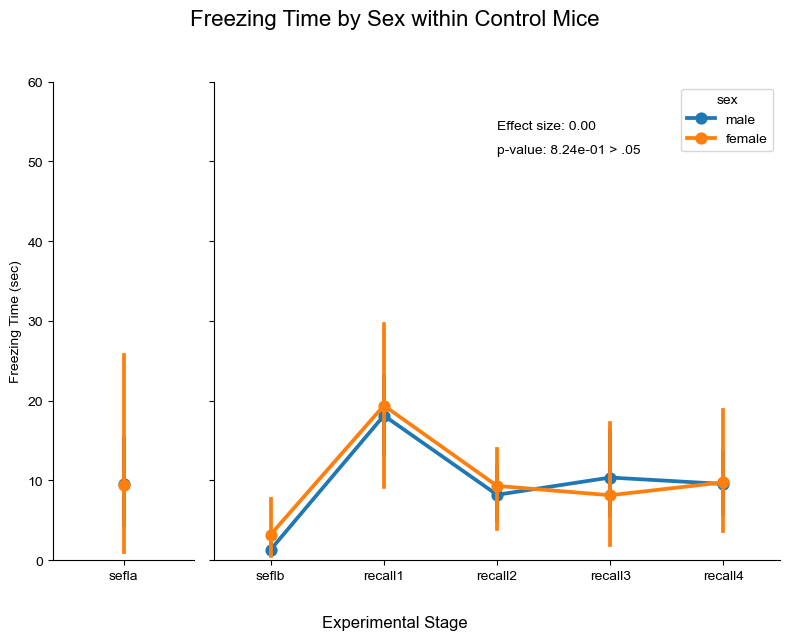

In [40]:
plot_freezing_time(sefl_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.006090, 
                   pvalue = 6.188880e-01, 
                   title_text = 'Freezing Time by Sex within SEFL Mice', 
                   hue = 'sex', 
                   output_filename='figure_4a_freezing_sex_sefl.svg')

plot_freezing_time(control_merged_data, 
                   variable='freezing_1s',
                   effect_size = 0.002105, 
                   pvalue = 8.238734e-01, 
                   title_text = 'Freezing Time by Sex within Control Mice', 
                   hue = 'sex', 
                   output_filename='figure_4b_freezing_sex_control.svg')